# Orientation Preference Maps

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import filters
import scipy.stats as ss

import sys
sys.path.append("..")

from opm import make_opm, plot_opm, plot_amplitude_map
from opm import ml_opm as calculate_map
from opm.plot import plot_orientation_histogram
from opm.response import response, compute_responses
from opm.stimuli import create_stimuli

In [6]:
np.random.seed(123)

## Ground truth map
We first create a "ground truth" orientation preference map. The real part a(x) and the imaginary part b(x) are created as standard Gaussian white noise, which is then convoluted with a difference of Gaussians filter (equations are analogous for b(x)):

$ \tilde{a}(x) = \mathcal{N}(0, 1) $

$
a(x) = \tilde{a}(x) * \mathcal{N}(x \;|\; 0, \sigma^2) - \tilde{a}(x) * \mathcal{N}(x \;|\; 0, k \sigma^2)
$

The orientation preference map is then

$ m(x) = a(x) + i b(x)  = A(x) \; exp[2i \, \theta(x)]$, 

where $A(x)$ is the absolute value of $m(x)$ and $2 \theta(x)$ is the argument of $m(x)$.

The pinwheels are detected as zero-crossings of the real and imaginary parts of the map.

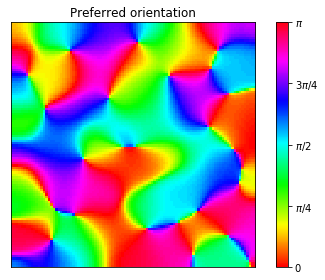

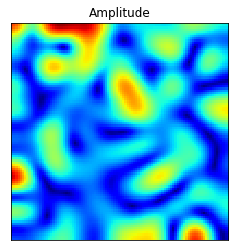

In [8]:
m = make_opm(size=100, sigma=8.)

f, ax, _ = plot_opm(m, shade=False)

f.tight_layout()
#f.savefig('plots/opm_shade.pdf')
plt.show()

f, ax = plot_amplitude_map(m)

In [10]:
m1 = (np.angle(m) + np.pi) / 2

m2 = np.angle(m) / 2 % np.pi



(array([1179.,  774.,  746.,  964., 1176., 1386.,  980.,  726.,  869.,
        1200.]),
 array([1.98381758e-05, 3.14168537e-01, 6.28317236e-01, 9.42465935e-01,
        1.25661463e+00, 1.57076333e+00, 1.88491203e+00, 2.19906073e+00,
        2.51320943e+00, 2.82735813e+00, 3.14150683e+00]),
 <a list of 10 Patch objects>)

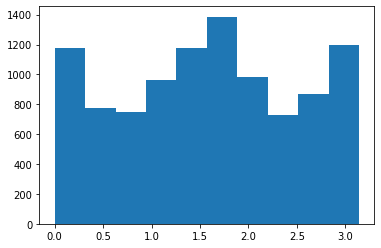

In [11]:
plt.hist(m1.flatten())

(array([1389.,  979.,  726.,  869., 1199., 1178.,  775.,  745.,  964.,
        1176.]),
 array([5.81152308e-04, 3.14670811e-01, 6.28760470e-01, 9.42850128e-01,
        1.25693979e+00, 1.57102945e+00, 1.88511910e+00, 2.19920876e+00,
        2.51329842e+00, 2.82738808e+00, 3.14147774e+00]),
 <a list of 10 Patch objects>)

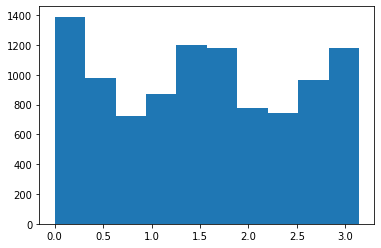

In [12]:
plt.hist(m2.flatten())

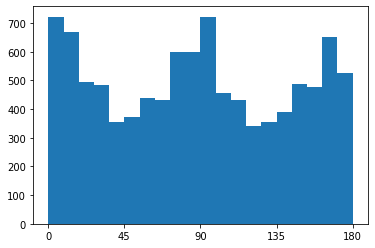

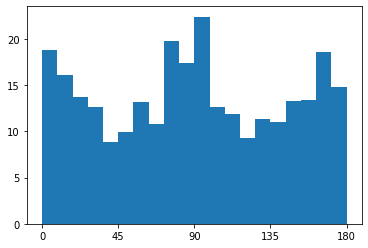

In [13]:
plot_orientation_histogram(m)
plt.show()

plot_orientation_histogram(m, weighted=True)
plt.show()

## Response model
Now we want to model the response to a stimulus

$\mathbf{s} = \begin{pmatrix}s_1 \\ s_2\end{pmatrix}$ with  $s_1 + s_2 = c_s \; exp(2i \, \theta_s)$,

where $c_s$ is the contrast of the stimulus and $\theta_s$ is the orientation of the stimulus.

We assume that the response at the pixel x is a linear function of the real and imaginary parts of the orientation map with additional Gaussian noise $\epsilon$ with variance $\sigma^2_n$:

$ r(x, s) = a(x) \, s_1(x) + b(x) \, s_2(x) + c + \epsilon \\
  = A \, cos(2\theta) \, c_s \, cos(2\theta_s) + A \, sin(2\theta) \, c_s \, sin(2\theta_s) + c + \epsilon
 $
 
Applying $ cos(\alpha - \beta) = cos(\alpha) cos(\beta) + sin(\alpha) sin(\beta) $, we obtain

$ r(x, s) = A \, c_s \, cos(2(\theta - \theta_s)) + c + \epsilon $

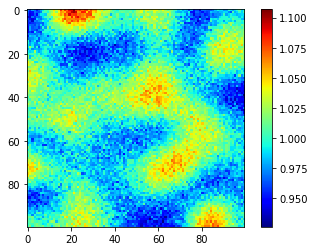

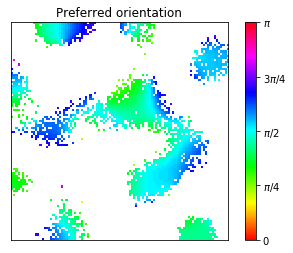

In [15]:
# we now assume we observe a stimulus with contrast c_s and orientation theta_s
c_s = 1.0
theta_s = 0 - np.pi/2

r = response(m, c_s, theta_s, c=1., sigma=0.01)

# plot response
im = plt.imshow(r, cmap='jet')
#im.set_clim(.7, 1.2)
plt.colorbar()

plt.show()

# check that the orientation that we have chosen is actually the one with the highest activity
mx = m.copy()
mx[r < 1.02] = np.nan

theta, theta_rgb, _ = plot_opm(mx, pinwheels=False)

plt.show()

We create a set of trials with different contrast and orientation conditions and compute the respective responses

In [16]:
contrasts = [1.0]
orientations = [i * np.pi / 4 - np.pi / 2 for i in range(4)]
repetitions = 16

S = create_stimuli(contrasts, orientations, repetitions)
R = compute_responses(m, contrasts, orientations, repetitions, sigma=0.1)

In [17]:
R.shape

(4, 16, 100, 100)

In [18]:
S[0]

array([[-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01],
       [-1.00000000e+00, -1.22464680e-16,  7.07106781e-01]])

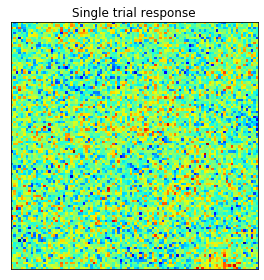

In [19]:
f, ax = plt.subplots()
ax.imshow(R[0,0,:,:], cmap='jet')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Single trial response')
plt.tight_layout()


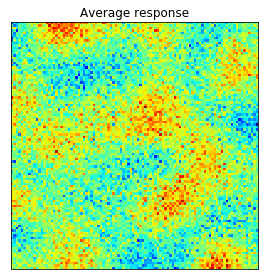

In [20]:
f, ax = plt.subplots()
ax.imshow(R.mean(axis=1)[0], cmap='jet')
ax.set_xticks([])
ax.set_yticks([])
plt.title('Average response')
plt.tight_layout()


## Maximum likelihood inference
Assume that we have observed activities for a set of N stimuli:

responses $ r_1(x) ... r_N(x) $

orientations $ \theta_1^s(x) ... \theta_N^s(x) $

contrasts $ c_1^s(x) ... c_N^s(x) $

Remember our model above:
$ r(x) = \mathbf{a}(x)^T \, s + c + \epsilon $, where $\mathbf{a}(x) = \begin{pmatrix}a(x) \\ b(x) \end{pmatrix}$,

which is a simple linear regression problem. The maximum likelihood estimate of $\mathbf{a}(x)$ is

$ \mathbf{\hat{a}}(x)  = (\sum_i \mathbf{s}_i \mathbf{s}_i^T)^{-1} \; \sum_i \mathbf{s}_i r_i(x) \\
= (\mathbf{S}^T \mathbf{S})^{-1} \, \mathbf{S}^T \, \mathbf{r}(x)$


In [21]:
M = calculate_map(R, S)
m_hat = (M[0] + 1j * M[1]).reshape((100, 100))

In [22]:
M.shape

(3, 100, 100)

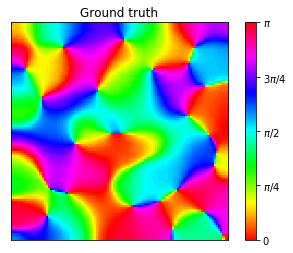

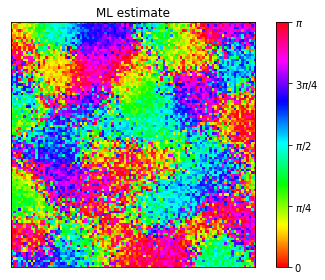

3.1407319700541265

In [23]:

# plot ground truth
plot_opm(m, title='Ground truth')
plt.show()

plot_opm(m_hat, title='ML estimate', pinwheels=False)
plt.tight_layout()
plt.show()

((np.angle(m_hat) + np.pi) / 2).max()

We smoothe the raw estimate with a Gaussian kernel. The variance of the Gaussian kernel is chosen in order to optimize the correlation with the ground truth map. 

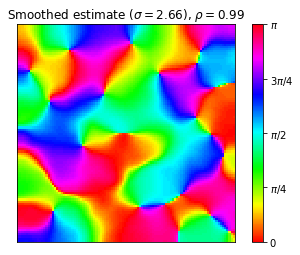

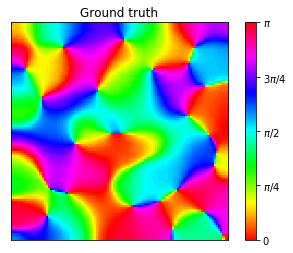

In [24]:
best_corr = -np.inf
best_sigma = np.nan
for sigma in 10**np.linspace(-2, 2, 100):
    
    # smoothe the estimate of the angle
    m_smooth = filters.gaussian_filter(M, sigma=(0, sigma, sigma))
    
    corr = ss.pearsonr(m_smooth[:2].reshape(-1), np.vstack((np.real(m), np.imag(m))).reshape(-1))[0]
    
    #plot_opm(m_smooth[0] + 1j * m_smooth[1], title=r'$\sigma = {0:.2f}$, $\rho = {1:.2f}$'.format(sigma, corr), pinwheels=False)
    #plt.show()
    
    if corr > best_corr:
        best_corr = corr
        best_sigma = sigma
        best_theta = m_smooth[0] + 1j * m_smooth[1]
        

plot_opm(best_theta, pinwheels=False,
         title=r'Smoothed estimate ($\sigma = {0:.2f}$), $\rho = {1:.2f}$'.format(best_sigma, best_corr))
plt.show()


plot_opm(m, title='Ground truth', pinwheels=False)
plt.show()

Now compare the preferred orientations of the ground truth map with the estimated map.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7cceedd7c0>)

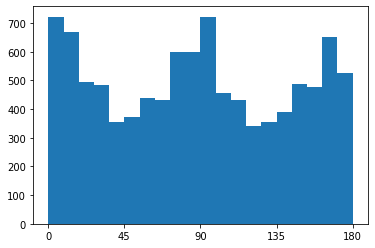

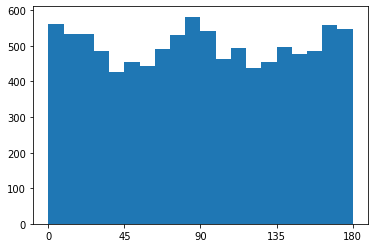

In [25]:
plot_orientation_histogram(m)

plot_orientation_histogram(m_hat)

In [27]:
from opm.gp import GaussianProcessOPM
from opm.gp.kernels import mexican_hat_kernel, fixed_k_mexhat
from opm.gp.helpers import get_2d_indices

size = (100, 100)
gp = GaussianProcessOPM(indices=get_2d_indices(size))

In [28]:
params = gp.optimize(S, R, verbose=True, p0={'sigma': 10.0, 'alpha': 2.0})

Estimating prior hyperparameters:
{'sigma': 6.381607616752968, 'alpha': 0.7717441455304697}


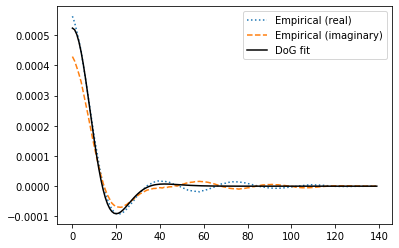

In [29]:
from opm.gp.match_radial_component import radial_component
from opm.gp.kernels import mexican_hat_kernel

corr_real, r  = radial_component(np.real(m))
corr_imag, r  = radial_component(np.imag(m))

plt.plot(r, corr_real, label='Empirical (real)', linestyle=':', color='C0')
plt.plot(r, corr_imag, label='Empirical (imaginary)', linestyle='--', color='C1')

plt.plot(r, mexican_hat_kernel(r[:,np.newaxis], 0, sigma=params['sigma'], alpha=params['alpha']), label='DoG fit', color='black')
plt.legend()
#plt.savefig('plots/dog_fit.pdf')

In [30]:
gp.idx.shape

(10000, 2)

In [ ]:
gp.fit(stimuli=S, responses=R, rank=1600, noise=np.eye(100*100)*0.1**2, verbose=True, p0={'sigma': 10.0, 'alpha': 2.0})

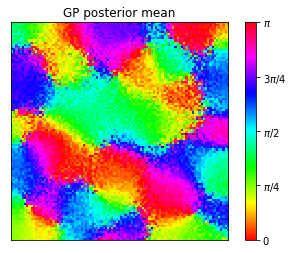

In [41]:
result = gp.mu_post[0] + 1j * gp.mu_post[1]
f, ax = plot_opm(result, title='GP posterior mean', pinwheels=False)

plt.savefig('plots/gp_mean.pdf')

In [39]:
gp.kernel_params

{'sigma': 7.26889548317927, 'alpha': 1.056294889176594}

In [40]:
gp.noise.covariance

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])